In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
gender = pd.read_csv('Transformed Data Set - Sheet1.csv')
gender.head()

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,Cool,Rock,Vodka,7UP/Sprite,F
1,Neutral,Hip hop,Vodka,Coca Cola/Pepsi,F
2,Warm,Rock,Wine,Coca Cola/Pepsi,F
3,Warm,Folk/Traditional,Whiskey,Fanta,F
4,Cool,Rock,Vodka,Coca Cola/Pepsi,F


In [3]:
from sklearn.model_selection import train_test_split
gender_train, gender_test = train_test_split(gender,test_size=0.5, random_state = 42)

In [4]:
gender_train['Gender'].value_counts()

F    17
M    16
Name: Gender, dtype: int64

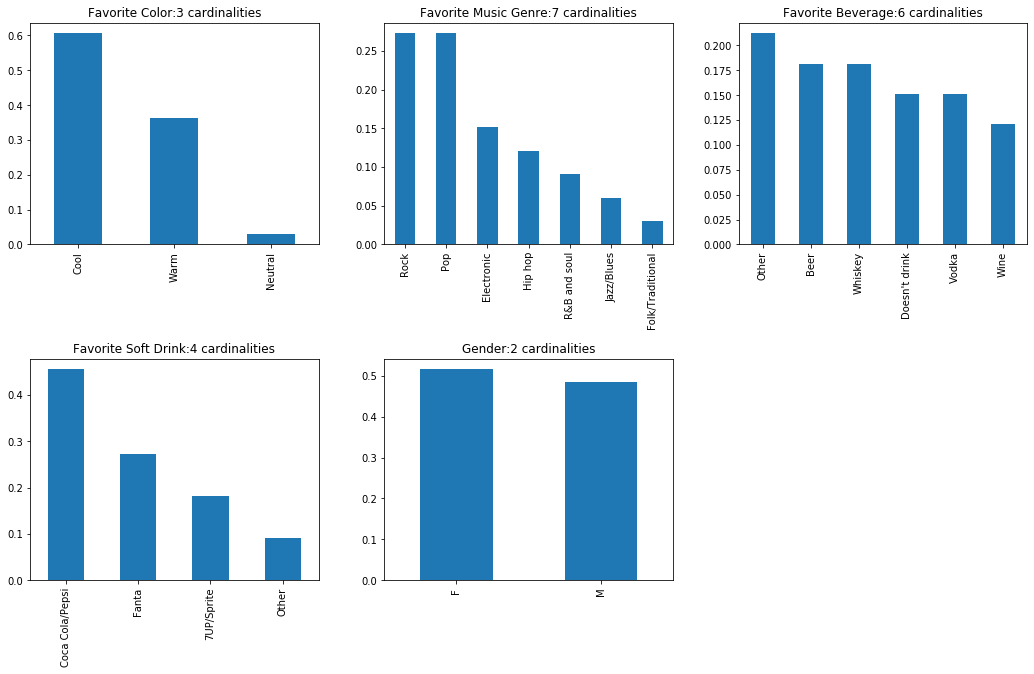

In [5]:
# from imblearn.over_sampling import SMOTENC
# sm = SMOTENC(sampling_strategy='all', random_state=42,categorical_features=[0,4], k_neighbors=5)
# X_res, y_res = sm.fit_resample(gender_train.iloc[:,:-1], gender_train.iloc[:,-1])
col_names = gender.columns
fig = plt.figure(figsize=(15,10))
for i, col in enumerate(col_names,start=1):
    fig.tight_layout(pad=3.00)
#     plt.figure(figsize=(8,8))
    plt.subplot(2,3, i, )
    cardinal = gender_train[col].nunique()
    plt.title(f'{col}:{cardinal} cardinalities')
    gender_train[col].value_counts(normalize=True).plot.bar()

In [6]:
def find_non_rare_labels(df, variable, tolerance):
    temp = df[variable].value_counts(normalize=True)
    labels = [i for i in temp.loc[temp >tolerance ].index.values]
    return labels


In [7]:
col_to_feature = gender_train.columns[1:-1]
col_to_feature.tolist()

per_to_use = [0.125, 0.125, 0.2]
new_dict = dict(zip(col_to_feature, per_to_use))

In [8]:
def rare_encoding(train,test, variable,tolerance):
    frequent_cat = find_non_rare_labels(train, variable, tolerance)
    train[variable] = np.where(train[variable].isin (frequent_cat), train[variable], 'Other')
    test[variable] = np.where(test[variable].isin (frequent_cat), test[variable], 'Other')
    
    return train, test

In [9]:
for col in new_dict:
    gender_train, gender_test= rare_encoding(gender_train, gender_test , col,new_dict[col])

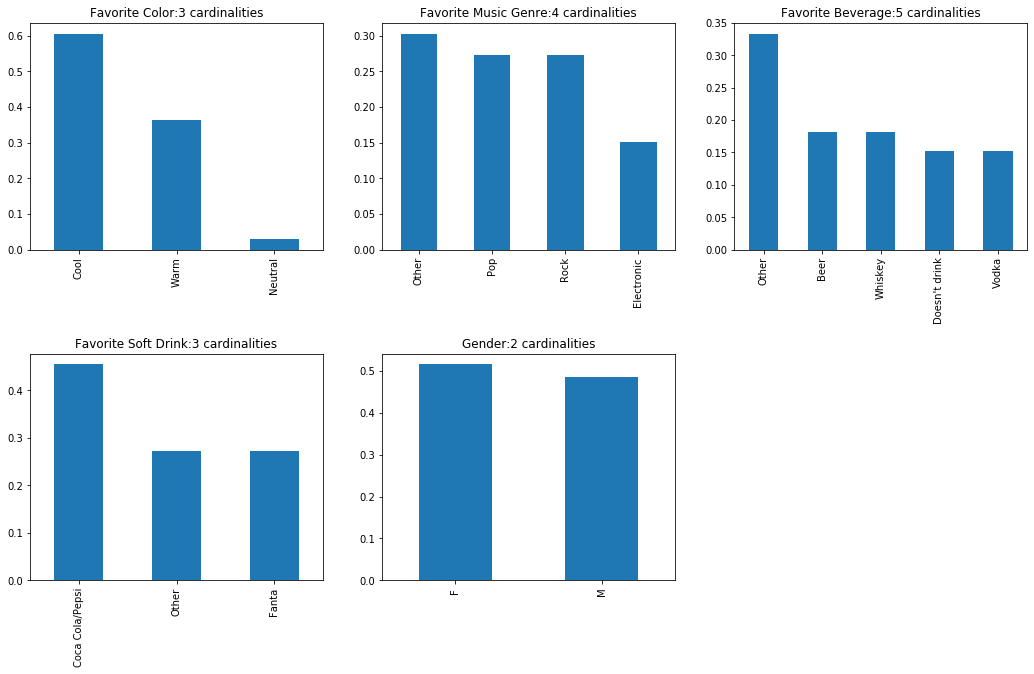

In [10]:
col_names = gender.columns
fig = plt.figure(figsize=(15,10))
for i, col in enumerate(col_names,start=1):
    fig.tight_layout(pad=3.00)
#     plt.figure(figsize=(8,8))
    plt.subplot(2,3, i, )
    cardinal = gender_train[col].nunique()
    plt.title(f'{col}:{cardinal} cardinalities')
    gender_train[col].value_counts(normalize=True).plot.bar()

In [11]:
def find_category_mappings(df, variable, target):

    tmp = pd.DataFrame(df.groupby([variable])[target].mean())
    
    tmp['non-target'] = 1 - tmp[target]
    
    tmp['ratio'] = (tmp[target] / tmp['non-target'])
    tmp['ratio'] = np.where(tmp['ratio']== np.inf, tmp['ratio'].mode(), tmp['ratio'])

    label_dict = tmp['ratio'].to_dict()
    return label_dict

In [12]:
def integer_encode(train, test, variable, ordinal_mapping):

    train[variable] = train[variable].map(ordinal_mapping)
    test[variable] = test[variable].map(ordinal_mapping)

In [13]:
gender_train['Gender'] = np.where(gender_train['Gender'] == 'F', 1, 0)
gender_test['Gender'] = np.where(gender_test['Gender'] == 'F', 1, 0)
new_col = col_names[:-1]
for col in new_col:
    label_dict = find_category_mappings(gender_train, col, 'Gender')
    integer_encode(gender_train,gender_test, col, label_dict)

In [17]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='all', random_state=42, k_neighbors=5)
X_res, y_res = sm.fit_resample(gender_train.iloc[:,:-1], gender_train.iloc[:,-1])

In [15]:
gender_train

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
15,1.0,1.00,1.200000,1.142857,1
27,1.0,3.50,0.666667,1.250000,1
26,1.0,3.50,2.000000,1.250000,1
24,1.0,1.00,1.000000,1.250000,1
47,1.0,1.00,1.000000,1.250000,0
11,1.0,3.50,1.200000,1.250000,1
32,1.0,1.00,2.000000,1.142857,1
61,1.0,0.80,0.666667,1.142857,0
46,1.0,1.00,1.200000,1.142857,0
37,1.0,3.50,1.200000,0.800000,0


In [16]:
# gender_train.isna().any()

In [19]:
len(y_res)

34

In [20]:
len(gender_train)

33

In [21]:
X_res, y_res = sm.fit_resample(X_res, y_res)

In [22]:
len(y_res)

34